In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
#import counter for the key value
from collections import Counter

# install NetworkX for graphs
!pip install networkx==2.5


In [2]:

#read dataset 

# find csv named "Ponzi_contracts.csv"
def find_csv(csvname):
    for root, dirs, files in os.walk(".", topdown=False):
    #    print('root: ', root)
        for filename in files:
            if filename == csvname:
                filepath = os.path.join(root, filename)
                print('file found: ',filename)
    print('Filepath: ', filepath)
    return filepath


dataset = find_csv("Ponzi_contracts.csv")
print('dataset: ', dataset)
pd_dataset = pd.read_csv(dataset, index_col=False)
print(pd_dataset.head(3))

#check the 0 label and 1 label
# Counter(pd_dataset['label'])
# Counter({1: 200, 0: 3586})

#given the dataset, parse through it and get each owner, instruction used and allocate them in a list of dictionaries
# with key the owner and corresponding value a Counter object of all instructions used for each contract.
def owner_opcode_dictionary_function(pd_first_dataset):
    # list of ponzi and non-ponzi depending on the labels that will hold a dictionary of key
    #  being the address and the values a counter object for all the opcodes used 
    owner_opcode_list_ponzi = []
    owner_opcode_list_non_ponzi = []
    # create a general one for classification model
    owner_opcode_list_general = []
    # filter the opcode_list to consider only required opcodes from list_to_consider
    # DUP12 is the sum of DUP 1 and DUP 2 
    list_to_consider = ["SSTORE", "POP", "MSTORE", "SWAP1", "STOP", "DUP9", "RETURN", "SWAP2", "DUP1", "DUP2","JUMP"]
    
    
    print('size: ', len(pd_first_dataset))
    for i in range(len(pd_first_dataset)):
        # define for each opcode a new list to store specific DUP1 & DUP2
        required_opcode_list_ponzi = []
        required_opcode_list_non_ponzi = []

        required_opcode_list =[]

        address = pd_first_dataset['address'][i]
        current_opcode = pd_first_dataset['opcode'][i]
    #    print('current_opcode:', current_opcode)
        opcode_owner= pd_first_dataset['creator'][i]
        # print('opcode_owner:', opcode_owner)
        opcode_label = pd_first_dataset['label'][i]
        # print('opcode label:', pd_first_dataset['label'][i])
        opcode_list = current_opcode.split('\n')
        # print('opcode_list: ', opcode_list)
        # check if row is labelled as ponzi or not 
        if opcode_label == 0:
            for j in opcode_list:
                if j in list_to_consider:
                    if j == 'DUP1' or j== "DUP2":
                        required_opcode_list_non_ponzi.append("DUP12")
                    else:
                        required_opcode_list_non_ponzi.append(j)
            # Counter to count frequency of ponzi and non-ponzi
            opcode_counter_non_ponzi= Counter(required_opcode_list_non_ponzi)
            # print('opcode_counter_non_ponzi' , opcode_counter_non_ponzi)
            owner_opcode_list_non_ponzi.append({'owner':opcode_owner, 'address': address, 'opcode_counter':opcode_counter_non_ponzi})
            owner_opcode_list_general.append({'owner':opcode_owner, 'address':address,'label': opcode_label, 'opcode_counter':opcode_counter_non_ponzi})
        else:
            for j in opcode_list:
                if j in list_to_consider:
                    if j == 'DUP1' or j== "DUP2":
                        required_opcode_list_ponzi.append("DUP12")
                    else:
                        required_opcode_list_ponzi.append(j)
            # counter for opcode frequency of ponzi
            opcode_counter_ponzi = Counter(required_opcode_list_ponzi)
    #        print('opcode_counter_ponzi' , opcode_counter_ponzi)
            owner_opcode_list_ponzi.append({'owner':opcode_owner, 'address':address, 'opcode_counter':opcode_counter_ponzi})
            owner_opcode_list_general.append({'owner':opcode_owner, 'address':address,'label':opcode_label, 'opcode_counter':opcode_counter_ponzi})

        # for demonstration use break statement 
        # if i == 1:
        #      break
    return owner_opcode_list_ponzi, owner_opcode_list_non_ponzi, owner_opcode_list_general
                    
owner_opcode_dict_ponzi, owner_opcode_dict_non_ponzi, owner_opcode_dict_general= owner_opcode_dictionary_function(pd_dataset)
# print('owner_opcode_dict_ponzi\n', owner_opcode_dict_ponzi)
# print(len(owner_opcode_dict_ponzi))
# print('owner_opcode_dict_non_ponzi\n', owner_opcode_dict_non_ponzi)
# print(len(owner_opcode_dict_non_ponzi))
# print('owner_opcode_dict_general\n', owner_opcode_dict_general)
# print(len(owner_opcode_dict_general))

file found:  Ponzi_contracts.csv
Filepath:  ./Ponzi_contracts/Ponzi_contracts.csv
dataset:  ./Ponzi_contracts/Ponzi_contracts.csv
                                      address  label  \
0  0x582b2489710a4189ad558b6958641789587fcc27      1   
1  0xeb4245c88c660ae4ee23c76954e5490ccd7bbd82      1   
2  0xd92d62ce8504e5c61aa17d9a9b13c65dbd77c268      1   

                                              opcode  \
0  PUSH1 0x60\nPUSH1 0x40\nMSTORE\nCALLDATASIZE\n...   
1  PUSH1 0x60\nPUSH1 0x40\nMSTORE\nCALLDATASIZE\n...   
2  PUSH1 0x60\nPUSH1 0x40\nMSTORE\nCALLDATASIZE\n...   

                                      creator  
0  0xc14c291012878568b95cfe3f0973f6d5a3a69b09  
1  0x43f9179a72d88182891502af8e80c32c7365e62b  
2  0x288ae6c4fcb11771359f9ee33855043e76c0a8fa  
size:  3786


In [3]:
# every record must have the following codes. If not just assign 0 
opcode_dictionary = {
    'SWAP1': 0,
    'SWAP2': 0,
    'DUP9' : 0,
    'DUP12': 0,
    'MSTORE':0,
    'POP': 0,
    'RETURN' : 0,
    'SSTORE' : 0,
    'STOP' : 0,
    'JUMP' : 0
}
# initialize empty dataframe to merge the records
sample_record = ['owner','example','address','example','label',0,'SWAP1', 0, 'SWAP2',0,'DUP9',0,'DUP12',0,'MSTORE',0,'POP',0,'RETURN', 0,\
'SSTORE', 0,'STOP', 0,'JUMP', 0]

sample_record_dict = {sample_record[i]: [sample_record[i+1]] for i in range(0,len(sample_record), 2)}
owner_addr_separate_code_df = pd.DataFrame.from_dict(sample_record_dict)
# print('owner_addr_separate_code_df\n',owner_addr_separate_code_df)
#remove the example row 
# list with all opcodes and non included are 0 
owner_addr_separate_code_list = []

df_general = pd.DataFrame(owner_opcode_dict_general)


for index, row in df_general.iterrows():
    owner = df_general['owner'][index]
#    print('owner:', owner)
    address = df_general['address'][index]
#    print('address:',address)
    label = df_general['label'][index]
    # print('label:',label)
    counter_value = df_general['opcode_counter'][index]

    # if index > 3780:
    #    print('row:\n', row)
    #     print(counter_value)
    #     print('owner',owner)
    #     print('address:', address)
    current_record = ['owner',owner,'address',address, 'label',label]
    for key in counter_value:
        current_record.append(key)
        current_record.append(counter_value[key])
    # print('current_record\n',current_record)
    
    # check if any of the opcodes is not included in the list and then add them with a value of 0 
    for specific_opcode in opcode_dictionary.keys():
        if specific_opcode not in current_record:
            current_record.append(specific_opcode)
            current_record.append(0)
    # print('updated_record:' ,current_record)


    # initialize new record to reorder columns in the predefined way
    only_values = []
    # find the keys according to the sample_record order in the current record and order them accordingly
    # consider only the values as the columns are predefined 
    for j in range(0,len(sample_record),2):
        value = current_record.index(sample_record[j])
        only_values.append(current_record[value+1])
    # print('only_values:', only_values)
    owner_addr_separate_code_df.loc[len(owner_addr_separate_code_df)] = only_values

# do not consider first line which is the example line
owner_addr_separate_code_df = owner_addr_separate_code_df[1:]
print('owner_addr_separate_code_df\n', owner_addr_separate_code_df)


owner_addr_separate_code_df
                                            owner  \
1     0xc14c291012878568b95cfe3f0973f6d5a3a69b09   
2     0x43f9179a72d88182891502af8e80c32c7365e62b   
3     0x288ae6c4fcb11771359f9ee33855043e76c0a8fa   
4     0xd229dbda0d510d3937604a0edf254004b495a9f0   
5     0x288ae6c4fcb11771359f9ee33855043e76c0a8fa   
...                                          ...   
3782  0x45ab6108cc41c20f416a98615aa8c349f02a275b   
3783  0x87c5b5874a18b4306df8a752a6c8cc3e82dafc19   
3784  0x8bae48f227d978d084b009b775222baaf61ed9fe   
3785  0x20c24a9a23076b6b89c6207cb14053458e5c199c   
3786  0x0047a8033cc6d6ca2ed5044674fd421f44884de8   

                                         address  label  SWAP1  SWAP2  DUP9  \
1     0x582b2489710a4189ad558b6958641789587fcc27      1    258    106     4   
2     0xeb4245c88c660ae4ee23c76954e5490ccd7bbd82      1    124     63     3   
3     0xd92d62ce8504e5c61aa17d9a9b13c65dbd77c268      1    645    201    19   
4     0xc352add7ad8cac8baa839d

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [7]:
copy_dataset = owner_addr_separate_code_df.copy()
copy_dataset.head(5)

,owner,address,label,SWAP1,SWAP2,DUP9,DUP12,MSTORE,POP,RETURN,SSTORE,STOP,JUMP
1,0xc14c291012878568b95cfe3f0973f6d5a3a69b09,0x582b2489710a4189ad558b6958641789587fcc27,1,258,106,4,353,143,119,30,26,5,120
2,0x43f9179a72d88182891502af8e80c32c7365e62b,0xeb4245c88c660ae4ee23c76954e5490ccd7bbd82,1,124,63,3,169,68,34,9,19,9,41
3,0x288ae6c4fcb11771359f9ee33855043e76c0a8fa,0xd92d62ce8504e5c61aa17d9a9b13c65dbd77c268,1,645,201,19,871,225,581,32,70,24,185
4,0xd229dbda0d510d3937604a0edf254004b495a9f0,0xc352add7ad8cac8baa839d8c88e7e9d7df9a219b,1,434,167,10,456,182,197,14,33,4,116
5,0x288ae6c4fcb11771359f9ee33855043e76c0a8fa,0x3f4dd010fbbc9a9b6d95f1f53837d7e9f3befac8,1,668,204,18,915,244,573,32,75,28,195


In [8]:
df = pd.DataFrame(copy_dataset) 
# 
y = df.iloc[1:,[2]]
# y = y_stuff
# _target
X = df.iloc[1:,[2,3,4,5,6,7,8,9,10,11,12]]
print(X.shape)
print(y.shape)

(3785, 11)
(3785, 1)


In [11]:
y_stuff = y['label']
y_stuff.shape

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_stuff, random_state = 42, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2838, 11) (947, 11) (2838,) (947,)


In [56]:
X_train.head(3)

,label,SWAP1,SWAP2,DUP9,DUP12,MSTORE,POP,RETURN,SSTORE,STOP,JUMP
1023,0,219,73,5,360,114,160,23,31,6,85
1770,0,149,73,0,279,84,152,11,7,2,34
607,0,156,80,2,250,100,121,12,9,1,38


In [47]:
LogisticRegression().get_params().keys()
# SGDClassifier().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


pipe = make_pipeline(LogisticRegression())
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]} 

cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
# Chose the stratified shuffle because it results in stratified randomized folds which retain the sample percentage for each class 

grid = GridSearchCV(pipe, param_grid, cv=cv, scoring = 'recall') 
grid.fit(X_train, y_train)

# Finding the optimal value for the C parameter of the logistic regression

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_)) 
print("Test set score: {:.2f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

In [ ]:
# No scaler used
# takes C=10 as recommededrecommended from grid search cv

logiXpipe = make_pipeline(LogisticRegression(C=10, random_state = 42))
logiXpipe.fit(X_train, y_train)
print("No scaler Test score: {:.2f}".format(logiXpipe.score(X_test, y_test)))

In [24]:
# grid search to figure C for precision  
# Best cross-validation accuracy: 0.95
# Test set score: 0.88
# Best parameters: {'logisticregression__C': 1}

In [25]:
# grid search to figure C for recall
# Best cross-validation accuracy: 0.88
# Test set score: 0.42
# Best parameters: {'logisticregression__C': 10}

In [26]:
X_test.shape

(947, 11)

In [29]:
y_score = logiXpipe.decision_function(X_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.76


Text(0.5, 1.0, '2-class Precision-Recall curve, LR with no scaling and C=10: AP=0.76')

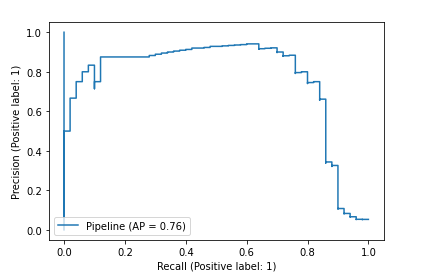

In [58]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(logiXpipe, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve, LR with no scaling and C=10: '
                   'AP={0:0.2f}'.format(average_precision), color = "white" )

In [31]:
# Pipeline logistic regression with scalers,C recommended by grid search

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

pipeRobustScaler = make_pipeline(RobustScaler(), LogisticRegression(C=10, random_state = 1642))
pipeRobustScaler.fit(X_train, y_train)
print("Test score Robust, c = 10, optimal for recall according to gridsearch: {:.2f}".format(pipeRobustScaler.score(X_test, y_test)))
y_scoreRobustScaler = pipeRobustScaler.decision_function(X_test)
average_precisionRobustScaler = average_precision_score(y_test, y_scoreRobustScaler)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precisionRobustScaler))

pipeStandardScaler = make_pipeline(StandardScaler(), LogisticRegression(C=10, random_state = 1642))
pipeStandardScaler.fit(X_train, y_train)
print("Test score Standard Scaler, c = 10, optimal for recall according to gridsearch: {:.2f}".format(pipeStandardScaler.score(X_test, y_test)))
y_scoreStandardScaler = pipeStandardScaler.decision_function(X_test)
average_precisionStandardScaler = average_precision_score(y_test, y_scoreStandardScaler)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precisionStandardScaler))


pipeMinMaxScaler = make_pipeline(MinMaxScaler(), LogisticRegression(C=10, random_state = 1642))
pipeMinMaxScaler.fit(X_train, y_train)
print("Test score Min Max Scaler, c = 10, optimal for recall according to gridsearch: {:.2f}".format(pipeMinMaxScaler.score(X_test, y_test)))
y_scoreMinMaxScaler = pipeMinMaxScaler.decision_function(X_test)
average_precisionMinMaxScaler = average_precision_score(y_test, y_scoreMinMaxScaler)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precisionMinMaxScaler))


pipeScaleLess = make_pipeline(LogisticRegression(C=10, random_state = 1642))
pipeScaleLess.fit(X_train, y_train)
print("Test score no scaler and C = 10: {:.2f}".format(pipeScaleLess.score(X_test,y_test)))
y_scoreScaleLess = pipeScaleLess.decision_function(X_test)
average_precisionScaleLess = average_precision_score(y_test, y_scoreScaleLess)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precisionScaleLess))



Test score Robust, c = 10, optimal for recall according to gridsearch: 1.00
Average precision-recall score: 1.00
Test score Standard Scaler, c = 10, optimal for recall according to gridsearch: 1.00
Average precision-recall score: 1.00
Test score Min Max Scaler, c = 10, optimal for recall according to gridsearch: 1.00
Average precision-recall score: 1.00
Test score no scaler and C = 10: 0.97
Average precision-recall score: 0.76
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
y_score = pipeMinMaxScaler.decision_function(X_test)


In [33]:
average_precision = average_precision_score(y_test, y_score)


In [34]:
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


In [35]:
y_score = pipeScaleLess.decision_function(X_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

SGD starts

In [ ]:
# from sklearn.linear_model import SGDClassifier


# pipe = make_pipeline(SGDClassifier())

# param_grid = {
#     'sgdclassifier__loss': ('log', 'hinge'),
#     'sgdclassifier__penalty': ['l1', 'l2', 'elasticnet'],
#     'sgdclassifier__alpha': [0.001, 0.0001, 0.00001, 0.000001]
# }


# cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
# # Chose the stratified shuffle because it results in stratified randomized folds which retain the sample percentage for each class 

# grid = GridSearchCV(pipe, param_grid, cv=cv, scoring = 'recall') 
# grid.fit(X_train, y_train)

# # Finding the optimal value for the C parameter of the logistic regression

# print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_)) 
# print("Test set score: {:.2f}".format(grid.score(X_test, y_test))) 
# print("Best parameters: {}".format(grid.best_params_))


In [ ]:
# # No scaler used
# # takes C=10 as recommededrecommended from grid search cv

# sgdXpipe = make_pipeline(SGDClassifier(alpha=0.001, random_state = 42))
# sgdXpipe.fit(X_train, y_train)
# print("No scaler Test score: {:.2f}".format(sgdXpipe.score(X_test, y_test)))



In [ ]:
# y_score = sgdXpipe.decision_function(X_test)

# from sklearn.metrics import average_precision_score
# average_precision = average_precision_score(y_test, y_score)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

In [ ]:
# from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# scaledsgdXpipe = make_pipeline(MinMaxScaler(), SGDClassifier(alpha=0.001, random_state = 42))
# scaledsgdXpipe.fit(X_train, y_train)
# print("Test score Min Max Scaler, alpha  = 0.001, optimal for recall according to gridsearch: {:.2f}".format(scaledsgdXpipe.score(X_test, y_test)))
# y_scoreMinMaxScaler = scaledsgdXpipe.decision_function(X_test)
# average_precisionMinMaxScaler = average_precision_score(y_test, y_scoreMinMaxScaler)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precisionMinMaxScaler))

SGD ends

In [61]:
def get_opcode_frequencies(dictionary):
    overall_sum_of_all_opcodes = 0
    overall_sum_opcode_counter_dict = {
        'SWAP1': 0,
        'SWAP2': 0,
        'DUP9' : 0,
        'DUP12': 0,
        'MSTORE':0,
        'POP': 0,
        'RETURN' : 0,
        'SSTORE' : 0,
        'STOP' : 0,
        'JUMP' : 0
    }

    # create shallow copy to not change the value of original when copy is altered.
    relative_opcode_counter_dict = overall_sum_opcode_counter_dict.copy()
    average_opcode_counter_dict = overall_sum_opcode_counter_dict.copy()

    for row_dict in dictionary:
        for value in row_dict['opcode_counter']:
            overall_sum_opcode_counter_dict[value] = overall_sum_opcode_counter_dict[value] + row_dict["opcode_counter"][value]
            overall_sum_of_all_opcodes = overall_sum_of_all_opcodes + row_dict['opcode_counter'][value]

    # divide each frequency with the total amount to get relative frequency 
    for entry_value in overall_sum_opcode_counter_dict:
        relative_opcode_counter_dict[entry_value] = overall_sum_opcode_counter_dict[entry_value] / overall_sum_of_all_opcodes
#    print('relative freq of each opcode:\n',relative_opcode_counter_dict)

    # compute the average by considering size of the dictionary
    size_of_dict = len(dictionary)
    for entry_value in overall_sum_opcode_counter_dict:
        average_opcode_counter_dict[entry_value] = overall_sum_opcode_counter_dict[entry_value] / size_of_dict
#    print('average freq of each opcode:\n',average_opcode_counter_dict)

    return relative_opcode_counter_dict, average_opcode_counter_dict

ponzi_relative_opcode_frequencies, ponzi_average_opcode_frequencies = get_opcode_frequencies(owner_opcode_dict_ponzi)
print('ponzi_relative_opcode_frequencies:', ponzi_relative_opcode_frequencies)
print('ponzi_average_opcode_frequencies:', ponzi_average_opcode_frequencies)

non_ponzi_relative_opcode_frequencies, non_ponzi_average_opcode_frequencies = get_opcode_frequencies(owner_opcode_dict_non_ponzi)
print('non_ponzi_relative_opcode_frequencies:', non_ponzi_relative_opcode_frequencies)
print('non_ponzi_average_opcode_frequencies:', non_ponzi_average_opcode_frequencies)



ponzi_relative_opcode_frequencies: {'SWAP1': 0.22679586121191928, 'SWAP2': 0.09885003647104379, 'DUP9': 0.010337965005808351, 'DUP12': 0.30111574378416345, 'MSTORE': 0.09355498122416635, 'POP': 0.1511702252199519, 'RETURN': 0.012355128909380713, 'SSTORE': 0.030230442965591145, 'STOP': 0.006375678766648356, 'JUMP': 0.06921393644132665}
ponzi_average_opcode_frequencies: {'SWAP1': 125.925, 'SWAP2': 54.885, 'DUP9': 5.74, 'DUP12': 167.19, 'MSTORE': 51.945, 'POP': 83.935, 'RETURN': 6.86, 'SSTORE': 16.785, 'STOP': 3.54, 'JUMP': 38.43}
non_ponzi_relative_opcode_frequencies: {'SWAP1': 0.22316111311768708, 'SWAP2': 0.09017065472118921, 'DUP9': 0.006158382510675735, 'DUP12': 0.3031379155575211, 'MSTORE': 0.10915270108051986, 'POP': 0.14972651931784858, 'RETURN': 0.01459598373979583, 'SSTORE': 0.020997590039365004, 'STOP': 0.006945390416179276, 'JUMP': 0.07595374949921829}
non_ponzi_average_opcode_frequencies: {'SWAP1': 170.4026770775237, 'SWAP2': 68.85303959843837, 'DUP9': 4.7024539877300615, 'DU

In [42]:
# This is where the visualization of the whole dataset begins.

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


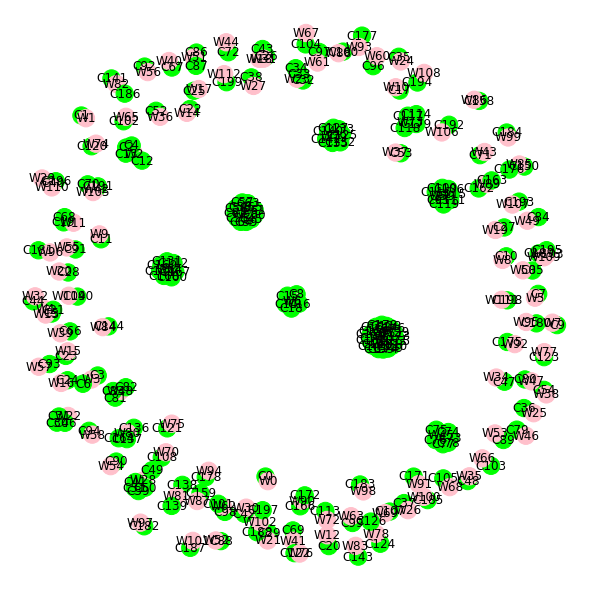

In [43]:
!pip install networkx==2.5
import networkx as nx

# populate the contracts 
df_example = pd.DataFrame.from_dict(owner_opcode_dict_ponzi)
# testing purposes check visualization
# df_example = df_example[:30]
#df_example.head()
df_example.drop(columns=['opcode_counter'])
df_example_rows = df_example
df_example_rows
# here
C = 0
W = 0
# nx.draw_spring(GAAdj, with_labels=True)
wallet_dictionary = {}
contract_dictionary = {}


for index, row in df_example.iterrows():
    owner = row['owner']
    contract = row['address']
    # print(owner,contract)
    if owner not in wallet_dictionary.keys(): 
        wallet_dictionary[owner] = 'W' + str(W)
        W += 1
    
    if contract not in contract_dictionary.keys(): 
        contract_dictionary[contract] = 'C' + str(C)
        C += 1

wColor = '#FFC0CB'
cColor = '#00FF00'

node_colors = []

wallet_dictionary.update(contract_dictionary)
G = nx.from_pandas_edgelist(df_example_rows, source='address', target='owner')
color_dict = {'W': wColor, 'C': cColor}

G = nx.relabel_nodes(G, wallet_dictionary)
for node in G.nodes():
    node_colors.append(color_dict[node[0]])

options = {"node_size": 500, "alpha": 0.8}

plt.figure(figsize=(8,8))

# would be nice to make the node size proportional to the amount of money that
# was put in the contract in the beginning
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()

nx.write_graphml(G, 'fullDataset.graphml')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f0ff243-a6be-405e-85de-a67e1fff1f5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>